<a href="https://colab.research.google.com/github/LiuYiShan613/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
#顯示小數到第二位
pd.set_option('display.float_format', lambda x:'%.2f'% x)

In [3]:
sales_data = pd.read_csv('/content/drive/MyDrive/data/data3_project.csv')
#查看前5筆檔案欄位資訊
sales_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [4]:
sales_data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404434,PS5219002028,GAXFG2,真正除臭抗菌噴霧(銀離子迷迭香)350ml,8.00,2020-12-31,441.00,9100003039464.00,竹區,2020-12-23,2020-12-10


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [6]:
sales_data.shape

(1404435, 10)

In [7]:
sales_data.Description.value_counts()

全背順氣活力SPA課程單堂         58636
清除環境中腸病毒濕紙巾10抽        52599
plus5智頻美塑儀課程單堂        46660
(新)溫熱刮痧課程單堂           34129
全身健康優化SPA課程單堂         33770
                      ...  
精準無痕BOTOX(單堂會員)30U        1
溫感緊緻輕盈(內)褲-膚色2XL          1
精準無痕保堤拉(單堂會員)100U         1
如膠似漆ISLA15                1
極線音波拉提900條(原價)            1
Name: Description, Length: 870, dtype: int64

In [8]:
sales_data['Description'].value_counts()

全背順氣活力SPA課程單堂         58636
清除環境中腸病毒濕紙巾10抽        52599
plus5智頻美塑儀課程單堂        46660
(新)溫熱刮痧課程單堂           34129
全身健康優化SPA課程單堂         33770
                      ...  
精準無痕BOTOX(單堂會員)30U        1
溫感緊緻輕盈(內)褲-膚色2XL          1
精準無痕保堤拉(單堂會員)100U         1
如膠似漆ISLA15                1
極線音波拉提900條(原價)            1
Name: Description, Length: 870, dtype: int64

In [9]:
#看data個欄位中有沒有null值
sales_data.isna().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [10]:
sales_data.loc[sales_data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1544,PS1001008016,MD-1265,2019營運售全背,32.00,2019-01-03,1859.00,nan,總管理處,NaN,NaN
1545,PS1001008016,JZA4G2,輕鬆．清新複方按摩油30ml,40.00,2019-01-03,2699.00,nan,總管理處,NaN,NaN
3470,PS1001008018,MD-1266,2019營運售太極,8.00,2019-01-05,509.00,nan,總管理處,NaN,NaN
3471,PS1001008018,K8016,植粹清香沐浴精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
3472,PS1001008018,K8017,植粹養護洗髮精500ml,8.00,2019-01-05,497.00,nan,總管理處,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1370084,PS5525021426,BJ079,佐登妮絲６號複方精油10ml,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1370085,PS5525021426,JYA1G1,玫瑰複方精油5ml HALAL,8.00,2020-12-14,1099.00,nan,高屏全區,NaN,NaN
1382674,PS5455008904,ZFE02,工本費,8.00,2020-12-21,509.00,nan,南區,NaN,NaN
1396234,PS5414018463,JZB4G1,呼暢護隨精油30ml,-8.00,2020-12-28,-1720.00,nan,南區,NaN,NaN


In [11]:
sales_data.drop(sales_data[sales_data['CustomerID'].isnull()].index,inplace=True)
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04
...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26


In [12]:
sales_data.shape

(1403724, 10)

In [13]:
sales_data['Revenue'] = sales_data['Quantity'] * abs(sales_data['UnitPrice'])
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00
...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00


In [14]:
sales_data.Revenue.describe()

count     1403724.00
mean        82668.84
std        922440.49
min     -41471304.00
25%          4672.00
50%          8752.00
75%         25904.00
max     702441768.00
Name: Revenue, dtype: float64

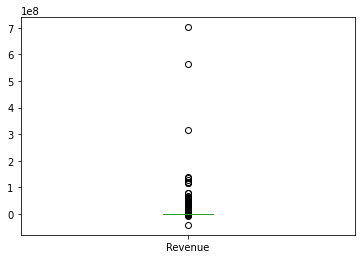

In [15]:
# 1.describe() 2.plot.box() 去看資料分布有沒有異常值
sales_data['Revenue'].plot.box()

In [16]:
sales_data1 = sales_data.copy()

# z-score()

Outliers=Observations with z-score>3 or <-3

In [17]:
#ddof=0 
sales_data['Revenue_zscore']=(sales_data['Revenue']-sales_data['Revenue'].mean())/sales_data['Revenue'].std(ddof=0)
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Revenue_zscore
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,-0.08
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,-0.10
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,-0.08


In [18]:
sales_data['Outlier'] = (abs(sales_data['Revenue_zscore'])>3).astype(int)
sales_data.loc[sales_data['Outlier']>0,['Revenue','Revenue_zscore']]

,Revenue,Revenue_zscore
1699,4844064.00,5.16
4458,4023600.00,4.27
4668,5788320.00,6.19
5070,11329248.00,12.19
6362,4023600.00,4.27
...,...,...
1402112,6006792.00,6.42
1402113,4755136.00,5.07
1402115,5851016.00,6.25
1402120,17226552.00,18.59


In [19]:
sales_data.loc[sales_data['Outlier']==0,['Revenue','Revenue_zscore']]

,Revenue,Revenue_zscore
0,10072.00,-0.08
1,6712.00,-0.08
2,6712.00,-0.08
3,-12008.00,-0.10
4,5376.00,-0.08
...,...,...
1404430,47136.00,-0.04
1404431,2472.00,-0.09
1404432,8752.00,-0.08
1404433,2640.00,-0.09


In [20]:
sales_data = sales_data[sales_data['Outlier']==0]
sales_data.shape

(1403032, 13)

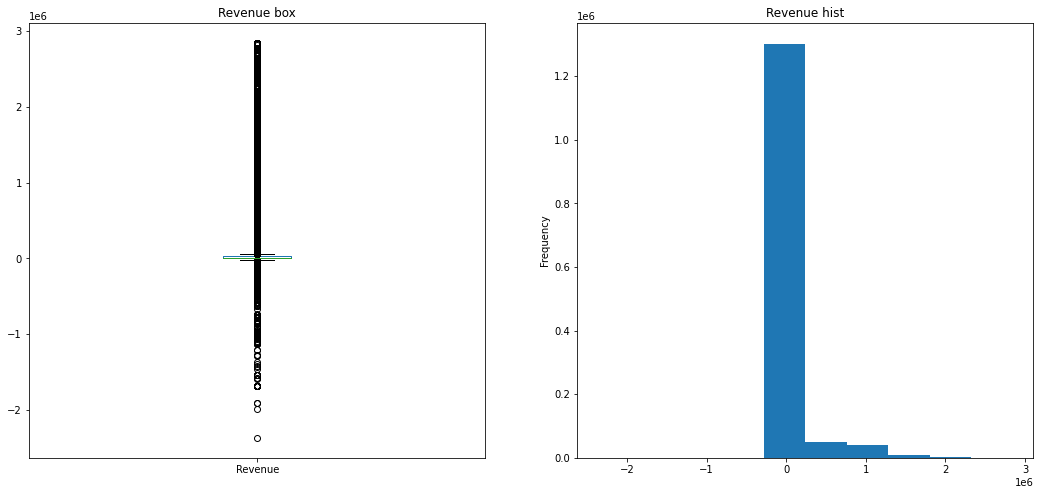

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

# IQR

IQR=Q3-Q1
Outliers = Observatons > Q3+1.5IQR or Q1-1.5IQR

In [22]:
def Outlier_treatment(datacolumn):
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5 * IQR)
  high_range = Q3+(1.5 * IQR)
  return lower_range, high_range

In [23]:
lowerbound, highbound = Outlier_treatment(sales_data1['Revenue'])
sales_data1[(sales_data1['Revenue']<lowerbound) | (sales_data1['Revenue']>highbound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
9,PS5262016031,HA89A01,肌因彈潤課程單堂,48.00,2019-01-01,9559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,458832.00
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.00,2019-01-01,11559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,1109664.00
13,PS530A050714,FB40A01,旗艦暖宮腹活SPA課程單堂,96.00,2019-01-01,13259.00,9100002554883.00,中區,2018-10-18,2018-10-18,1272864.00
19,PS5323017890,K0464B,DC龍血緊緻修護面膜26ml+5g-單包,-56.00,2019-01-01,-1006.00,9100000045758.00,中區,2001-05-20,2012-07-17,-56336.00
31,PS5213017253,HA50A01,胜肽美顏SPA護理單堂,48.00,2019-01-01,6059.00,9100001531076.00,台北B區,2013-11-23,2013-04-09,290832.00
...,...,...,...,...,...,...,...,...,...,...,...
1404400,PS5324024939,JAA3G2,玻尿酸超保濕精華96%原液60ml,16.00,2020-12-31,4239.00,9100000043037.00,中區,2004-11-11,2012-07-23,67824.00
1404401,PS5324024939,KQ02,玫瑰晶萃活膚液130ml,24.00,2020-12-31,5395.00,9100000043037.00,中區,2004-11-11,2012-07-23,129480.00
1404418,PS5324024940,KQ06,玫瑰晶萃瞬效霜30ml,16.00,2020-12-31,4083.00,9100000706055.00,中區,2011-12-21,2014-03-10,65328.00
1404421,PS5324024940,MAA7G1,白金密集煥白面膜18ml*6pcs,32.00,2020-12-31,6923.00,9100000706055.00,中區,2011-12-21,2014-03-10,221536.00


In [24]:
sales_data1.drop(sales_data1[(sales_data1['Revenue']<lowerbound) | (sales_data1['Revenue']>highbound)].index, inplace=True)  

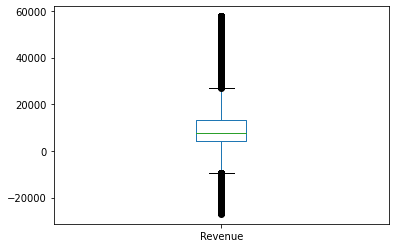

In [25]:
#單畫一張圖
sales_data1['Revenue'].plot.box()
plt.show()

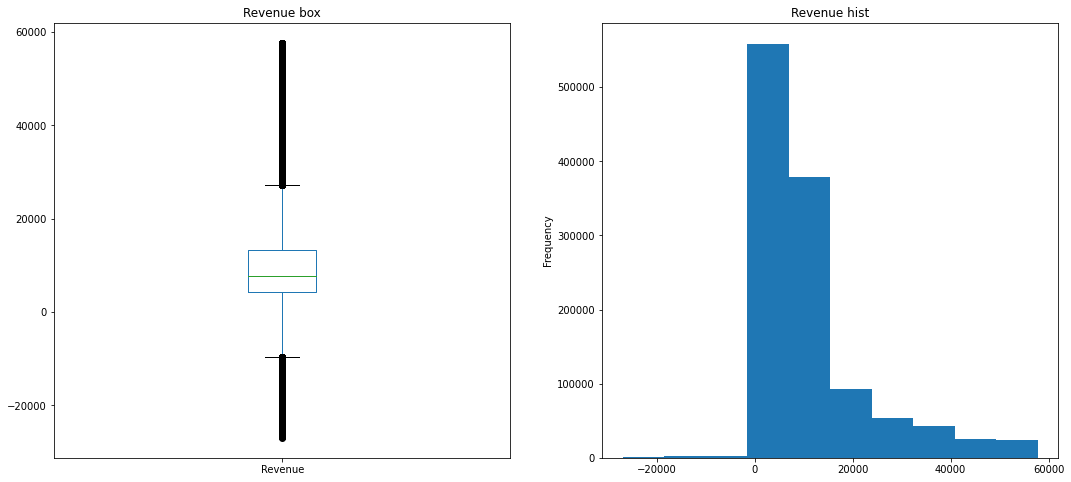

In [26]:
figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data1['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data1['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

# EDA

### Monthly Revenue

In [27]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [28]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1181196 non-null  object 
 1   StockCode          1181196 non-null  object 
 2   Description        1181196 non-null  object 
 3   Quantity           1181196 non-null  float64
 4   InvoiceDate        1181196 non-null  object 
 5   UnitPrice          1181196 non-null  float64
 6   CustomerID         1181196 non-null  float64
 7   Country            1181196 non-null  object 
 8   member_start_date  1144520 non-null  object 
 9   first_trans_date   1177960 non-null  object 
 10  Revenue            1181196 non-null  float64
dtypes: float64(4), object(7)
memory usage: 108.1+ MB


In [29]:
sales_data1['InvoiceDate'] = pd.to_datetime(sales_data1['InvoiceDate'])
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181196 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1181196 non-null  object        
 1   StockCode          1181196 non-null  object        
 2   Description        1181196 non-null  object        
 3   Quantity           1181196 non-null  float64       
 4   InvoiceDate        1181196 non-null  datetime64[ns]
 5   UnitPrice          1181196 non-null  float64       
 6   CustomerID         1181196 non-null  float64       
 7   Country            1181196 non-null  object        
 8   member_start_date  1144520 non-null  object        
 9   first_trans_date   1177960 non-null  object        
 10  Revenue            1181196 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.1+ MB


In [30]:
sales_data1['YearMonth'] = sales_data1['InvoiceDate'].map(lambda date:100 * date.year+date.month)
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [31]:
tx_revenue = sales_data1.groupby(['YearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,YearMonth,Revenue
0,201901,425743824.00
1,201902,300617976.00
2,201903,699778888.00
3,201904,516812544.00
4,201905,551044368.00
5,201906,453681976.00
6,201907,480213760.00
7,201908,500785128.00
8,201909,553368896.00
9,201910,643763416.00


In [32]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     int64  
 1   Revenue    24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [33]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str)
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


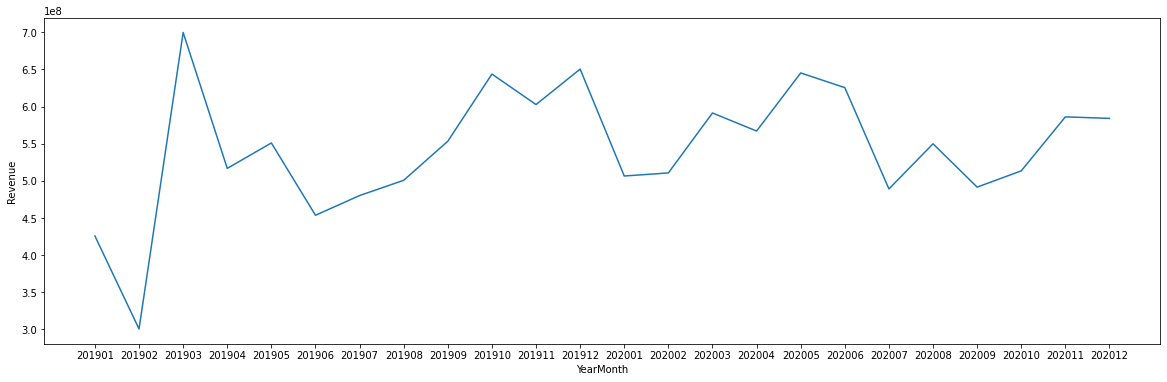

In [34]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax=axes, x='YearMonth', y='Revenue', data=tx_revenue)
plt.show()

### Monthly Growth Rate

In [35]:
#成長率公式 : 公式和前一個colum的revenue差異的百分比
tx_revenue['GrothRate'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,YearMonth,Revenue,GrothRate
0,201901,425743824.00,nan
1,201902,300617976.00,-0.29
2,201903,699778888.00,1.33
3,201904,516812544.00,-0.26
4,201905,551044368.00,0.07
5,201906,453681976.00,-0.18
6,201907,480213760.00,0.06
7,201908,500785128.00,0.04
8,201909,553368896.00,0.11
9,201910,643763416.00,0.16


In [36]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
 2   GrothRate  23 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


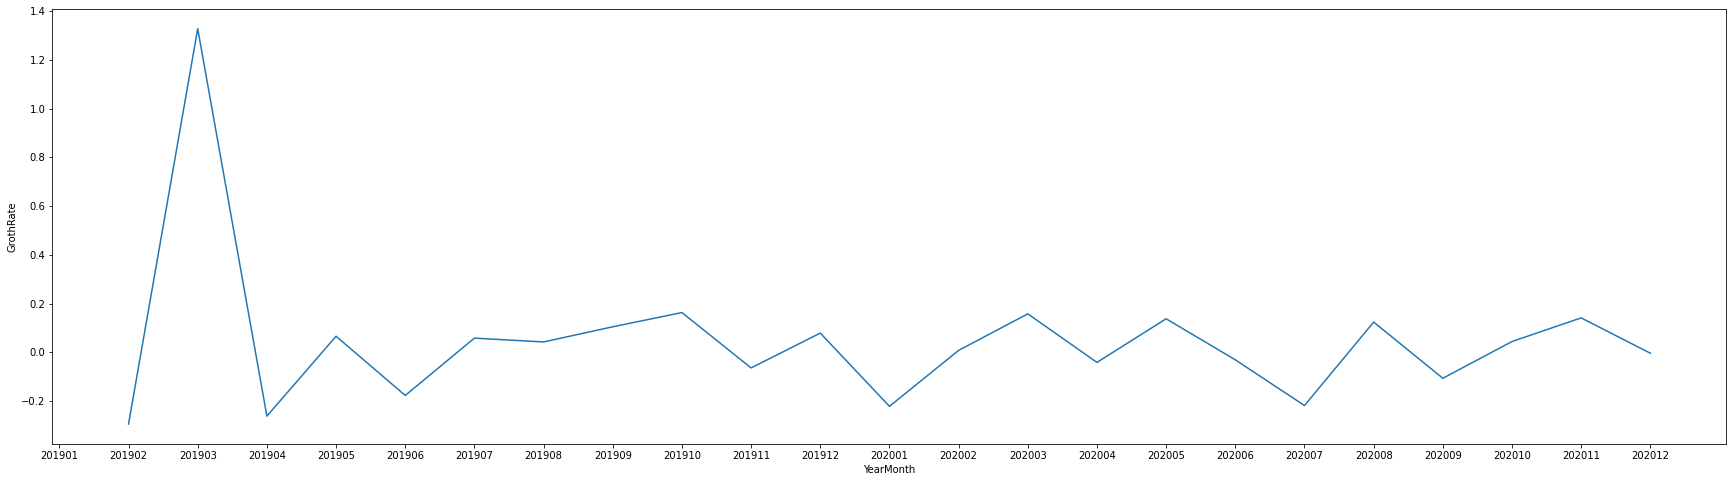

In [37]:
figure,axes = plt.subplots(figsize=(30,8))
sns.lineplot(ax=axes, x='YearMonth', y='GrothRate', data=tx_revenue)
plt.show()

### Monthy Order Count

In [38]:
tx_revenue = sales_data1.groupby(['YearMonth'])['Quantity'].sum().reset_index()
tx_revenue

,YearMonth,Quantity
0,201901,372096.00
1,201902,243576.00
2,201903,760144.00
3,201904,514888.00
4,201905,489304.00
5,201906,406304.00
6,201907,407536.00
7,201908,449040.00
8,201909,453488.00
9,201910,648960.00


In [39]:
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     int64  
 1   Quantity   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [40]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str)
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Quantity   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


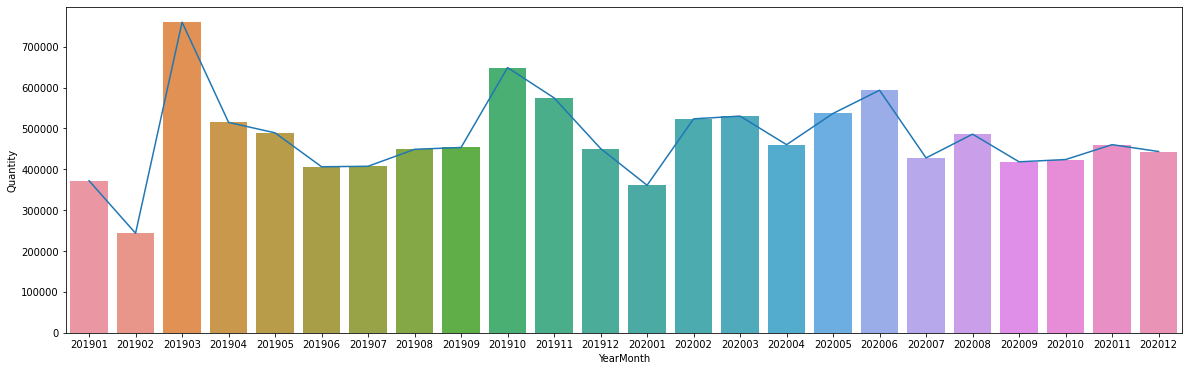

In [41]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax=axes, x='YearMonth', y='Quantity', data=tx_revenue)
sns.barplot(ax=axes, x='YearMonth', y='Quantity', data=tx_revenue)
plt.show()

### Average Revenue per Order

In [42]:
tx_revenue_avg = sales_data1.groupby(['YearMonth'])['Revenue'].mean().reset_index()
tx_revenue_avg

,YearMonth,Revenue
0,201901,9859.97
1,201902,10893.93
2,201903,9157.61
3,201904,10094.59
4,201905,10560.05
5,201906,10836.53
6,201907,11346.94
7,201908,10429.33
8,201909,11319.58
9,201910,13218.15


In [43]:
tx_revenue_avg['YearMonth'] = tx_revenue_avg['YearMonth'].astype(str)

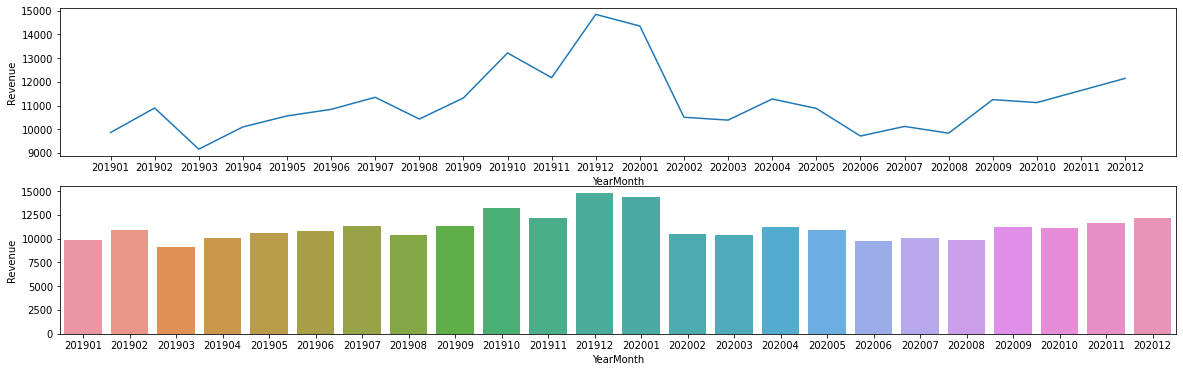

In [44]:
figure,axes = plt.subplots(2,1,figsize=(20,6))
sns.lineplot(ax=axes[0], x='YearMonth', y='Revenue', data=tx_revenue_avg)
sns.barplot(ax=axes[1], x='YearMonth', y='Revenue', data=tx_revenue_avg)
plt.show()

### Monthly Activate Customers

In [45]:
tx_monthly_activate = sales_data1.groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
tx_monthly_activate

,YearMonth,CustomerID
0,201901,11061
1,201902,8593
2,201903,15972
3,201904,11846
4,201905,12569
5,201906,11159
6,201907,10981
7,201908,12747
8,201909,12498
9,201910,14506


In [46]:
tx_monthly_activate['YearMonth'] = tx_revenue_avg['YearMonth'].astype(str)
tx_monthly_activate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   24 non-null     object
 1   CustomerID  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


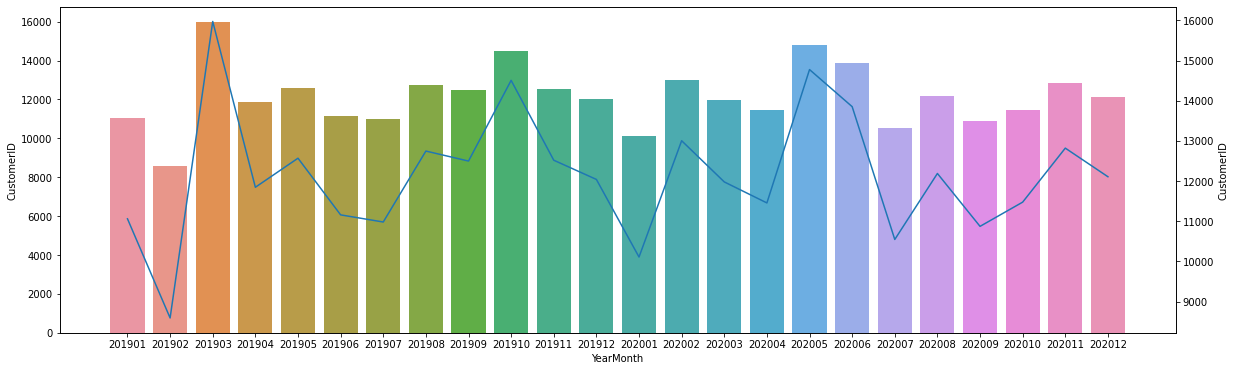

In [47]:
figure,axes1 = plt.subplots(figsize=(20,6))
sns.barplot(ax=axes1, x='YearMonth', y='CustomerID', data=tx_monthly_activate)
axes2 = axes1.twinx()
sns.lineplot(ax=axes2, x='YearMonth', y='CustomerID', data=tx_monthly_activate)
plt.show()

In [48]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


### Recency

In [49]:
#create tx_user for assigning clustering
sales_data_user = pd.DataFrame(sales_data1['CustomerID'].unique())
sales_data_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it 
tx_max_purchase = sales_data1.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
#on:主鍵
sales_data_user = pd.merge(sales_data_user, tx_max_purchase[['CustomerID', 'Recency']], on='CustomerID')

#we take our observation point as the max invoice data in our dataset
#tx_max_purchase['Recency'] = ((tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']))/np.timedelta64(1,)
sales_data_user

,CustomerID,Recency
0,9100002488768.00,123
1,9100002556566.00,186
2,9100002582077.00,301
3,9100002426142.00,555
4,9100000301403.00,82
...,...,...
78439,9100003057270.00,0
78440,9100003057284.00,0
78441,9100001069371.00,0
78442,9100000262193.00,0


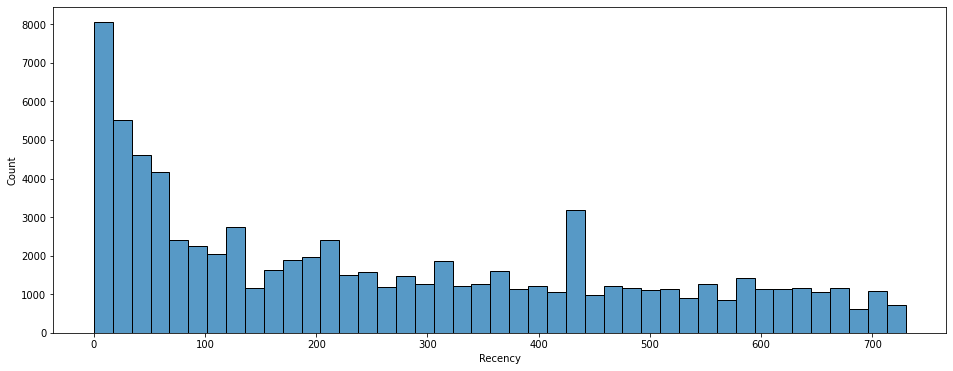

In [50]:
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Recency'],ax=axes)
plt.show()

In [51]:
sales_data_user.Recency.describe()

count   78444.00
mean      259.36
std       216.96
min         0.00
25%        57.00
50%       212.00
75%       428.00
max       730.00
Name: Recency, dtype: float64

In [52]:
# function for ordering cluster numbers
# 把cluster做排序
def order_cluster(cluster_field_name, target_field_name,df,ascending):
  new_cluster_field_name = 'new_' + cluster_field_name
  df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
  df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
  df_new['index'] = df_new.index
  df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
  df_final = df_final.drop([cluster_field_name],axis=1)
  df_final = df_final.rename(columns={"index":cluster_field_name})
  return df_final

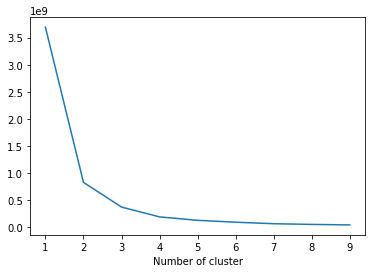

In [53]:
from sklearn.cluster import KMeans

sse={}
tx_recency = sales_data_user[['Recency']]
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
  tx_recency["clusters"] = kmeans.labels_
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Recency']])
sales_data_user['RecencyCluster'] = kmeans.predict(sales_data_user[['Recency']])
#false降冪
sales_data_user = order_cluster('RecencyCluster','Recency', sales_data_user, False)

sales_data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,12708.00,622.40,56.70,524.00,577.00,619.00,669.00,730.00
1,15650.00,423.84,53.25,329.00,377.00,427.00,464.75,523.00
2,17805.00,232.51,52.25,143.00,189.00,224.00,279.00,328.00
3,32281.00,51.51,40.47,0.00,17.00,42.00,81.00,142.00


### Frequency

In [55]:
#get order counts for each user and create a dataframe with it
tx_frequency = sales_data1.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_frequency, on='CustomerID')
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency
0,9100002488768.00,123,3,23
1,9100000301403.00,82,3,37
2,9100000382303.00,13,3,76
3,9100000045758.00,54,3,91
4,9100000190649.00,34,3,104
...,...,...,...,...
78439,9100002763223.00,329,1,1
78440,9100002763049.00,329,1,2
78441,9100002763216.00,329,1,1
78442,9100002763240.00,329,1,2


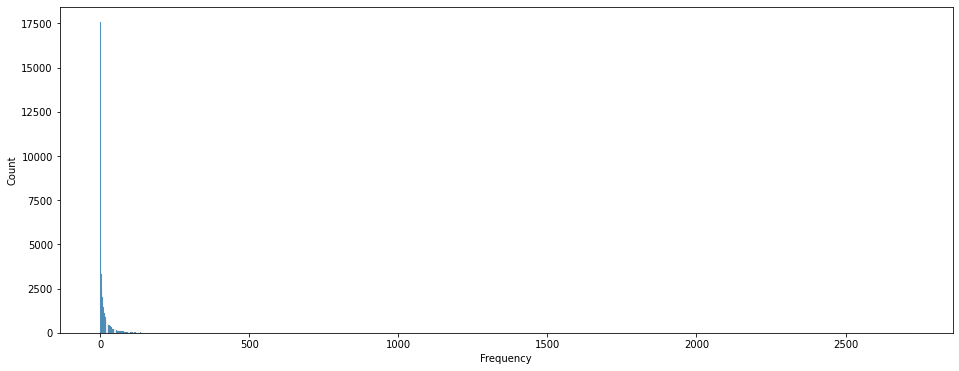

In [56]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Frequency'], ax=axes)
plt.show()

In [57]:
tx_frequency.Frequency.describe()

count   78444.00
mean       15.06
std        29.15
min         1.00
25%         2.00
50%         5.00
75%        18.00
max      2723.00
Name: Frequency, dtype: float64

In [58]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])
#false降冪
sales_data_user = order_cluster('FrequencyCluster','Frequency', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,65770.00,6.53,6.86,1.00,1.00,3.00,10.00,27.00
1,11164.00,47.83,16.92,28.00,34.00,43.00,58.00,94.00
2,1507.00,140.42,63.06,95.00,106.00,122.00,150.00,1026.00
3,3.00,2121.00,549.93,1645.00,1820.00,1995.00,2359.00,2723.00


In [59]:
tx_frequency

,CustomerID,Frequency
0,9100000000061.00,15
1,9100000000085.00,21
2,9100000000092.00,6
3,9100000000115.00,17
4,9100000000170.00,2
...,...,...
78439,9100003125563.00,1
78440,9100003140535.00,1
78441,9100003149890.00,2
78442,9100003151982.00,2


In [60]:
lowerbound, highbound = Outlier_treatment(sales_data_user['Frequency'])
sales_data_user[(sales_data_user['Frequency']<lowerbound) | (sales_data_user['Frequency']>highbound)]

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
65771,9100000382303.00,13,3,76,1
65772,9100000045758.00,54,3,91,1
65773,9100002165225.00,103,3,50,1
65774,9100002432426.00,50,3,63,1
65776,9100000161946.00,14,3,85,1
...,...,...,...,...,...
78439,9100000502619.00,366,1,104,2
78440,9100000240023.00,349,1,124,2
78441,9100000092219.00,31,3,1995,3
78442,9100000300536.00,2,3,1645,3


In [61]:
sales_data_user.drop(sales_data_user[(sales_data_user['Frequency']<lowerbound) | (sales_data_user['Frequency']>highbound)].index, inplace=True) 

In [62]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])
#false降冪
sales_data_user = order_cluster('FrequencyCluster','Frequency', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,40255.00,2.04,1.22,1.00,1.00,2.00,3.00,5.00
1,15448.00,9.35,2.55,6.00,7.00,9.00,11.00,14.00
2,9541.00,19.75,3.41,15.00,17.00,19.00,23.00,26.00
3,5961.00,33.50,4.52,27.00,30.00,33.00,37.00,42.00


## Monetary

In [63]:
tx_revenue = sales_data1.groupby('CustomerID').Revenue.sum().reset_index()

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_revenue, on='CustomerID')
sales_data_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,9100002488768.00,123,3,23,2,268088.00
1,9100002508831.00,16,3,25,2,276824.00
2,9100001761848.00,61,3,20,2,197248.00
3,9100002514344.00,32,3,15,2,219224.00
4,9100002106044.00,1,3,20,2,165816.00


In [64]:
sales_data_user.Revenue.describe()

count     71205.00
mean      89194.74
std      120487.65
min      -24584.00
25%        8048.00
50%       31776.00
75%      129592.00
max     1049096.00
Name: Revenue, dtype: float64

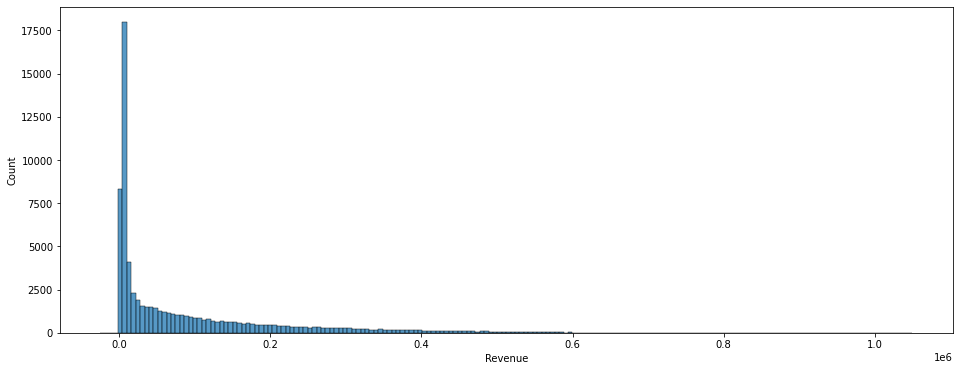

In [65]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Revenue'], ax=axes)
plt.show()

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sales_data_user[['Revenue']])
sales_data_user['RevenueCluster'] = kmeans.predict(sales_data_user[['Revenue']])
#false降冪
sales_data_user = order_cluster('RevenueCluster','Revenue', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,44053.00,16769.55,17522.58,-24584.00,5272.00,8928.00,23096.00,68584.00
1,15275.00,120504.91,34886.26,68600.00,89888.00,115776.00,148728.00,191304.00
2,8470.00,261890.57,47529.72,191360.00,219594.00,256500.00,299736.00,359328.00
3,3407.00,455954.43,86522.31,359360.00,391184.00,433664.00,491936.00,1049096.00


## Customer lifetime value

In [67]:
sales_data_user['OverallScore'] = sales_data_user['FrequencyCluster'] + sales_data_user['FrequencyCluster']+ sales_data_user['RevenueCluster']

print(sales_data_user.groupby('OverallScore')['Recency'].mean())
print(sales_data_user.groupby('OverallScore')['Frequency'].mean())
print(sales_data_user.groupby('OverallScore')['Revenue'].mean())

OverallScore
0   371.09
1   308.53
2   242.99
3   206.58
4   197.40
5   139.23
6   126.85
7   138.65
8    84.01
9    82.51
Name: Recency, dtype: float64
OverallScore
0    1.98
1    4.20
2    7.66
3    9.98
4   12.70
5   18.12
6   20.83
7   25.25
8   31.94
9   35.23
Name: Frequency, dtype: float64
OverallScore
0    13049.57
1    89749.37
2    46096.86
3   112234.64
4   202569.46
5   147606.80
6   251350.14
7   337361.96
8   289640.82
9   463190.02
Name: Revenue, dtype: float64


## Labelng

In [68]:
sales_data_user['Segment'] = 'Low-Value'
sales_data_user.loc[sales_data_user['OverallScore']>2,'Segment'] = 'Mid-Value'
sales_data_user.loc[sales_data_user['OverallScore']>4,'Segment'] = 'High-Value'
sales_data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,6,High-Value
1,9100002508831.00,16,3,25,2,276824.00,2,6,High-Value
2,9100001761848.00,61,3,20,2,197248.00,2,6,High-Value
3,9100002514344.00,32,3,15,2,219224.00,2,6,High-Value
4,9100002184202.00,18,3,20,2,235864.00,2,6,High-Value
...,...,...,...,...,...,...,...,...,...
71200,9100002763223.00,329,1,1,0,5272.00,0,0,Low-Value
71201,9100002763049.00,329,1,2,0,8048.00,0,0,Low-Value
71202,9100002763216.00,329,1,1,0,5272.00,0,0,Low-Value
71203,9100002763240.00,329,1,2,0,8048.00,0,0,Low-Value


In [69]:
sales_data_user.to_csv("/content/drive/MyDrive/data/new.csv")